# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [26]:
# Imports
!pip install pyreadline
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [4]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path)

In [3]:
# Calcule a média de preço por marca e por veículo


,avgPrice,brand,vehicleType
0,897,volkswagen,Other
1,8014,volkswagen,coupe
2,13946,volkswagen,suv
3,1626,volkswagen,kleinwagen
4,3743,volkswagen,limousine


In [39]:
ls_grouped = []
for brand in list(df["brand"].unique()):
    for vType in list(df["vehicleType"].unique()):
        mean = df[(df["brand"] == brand) & (df["vehicleType"] == vType)]["price"].mean()
        ls_grouped.append({"brand": brand, "vehicleType": vType, "meanPrice": mean})

In [24]:
df_grouped = pd.DataFrame(ls_grouped)
df_grouped["meanPrice"].fillna(0,inplace=True)
df_grouped["meanPrice"] = df_grouped["meanPrice"].astype(int)
df_grouped.head()

,brand,vehicleType,meanPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

In [30]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo


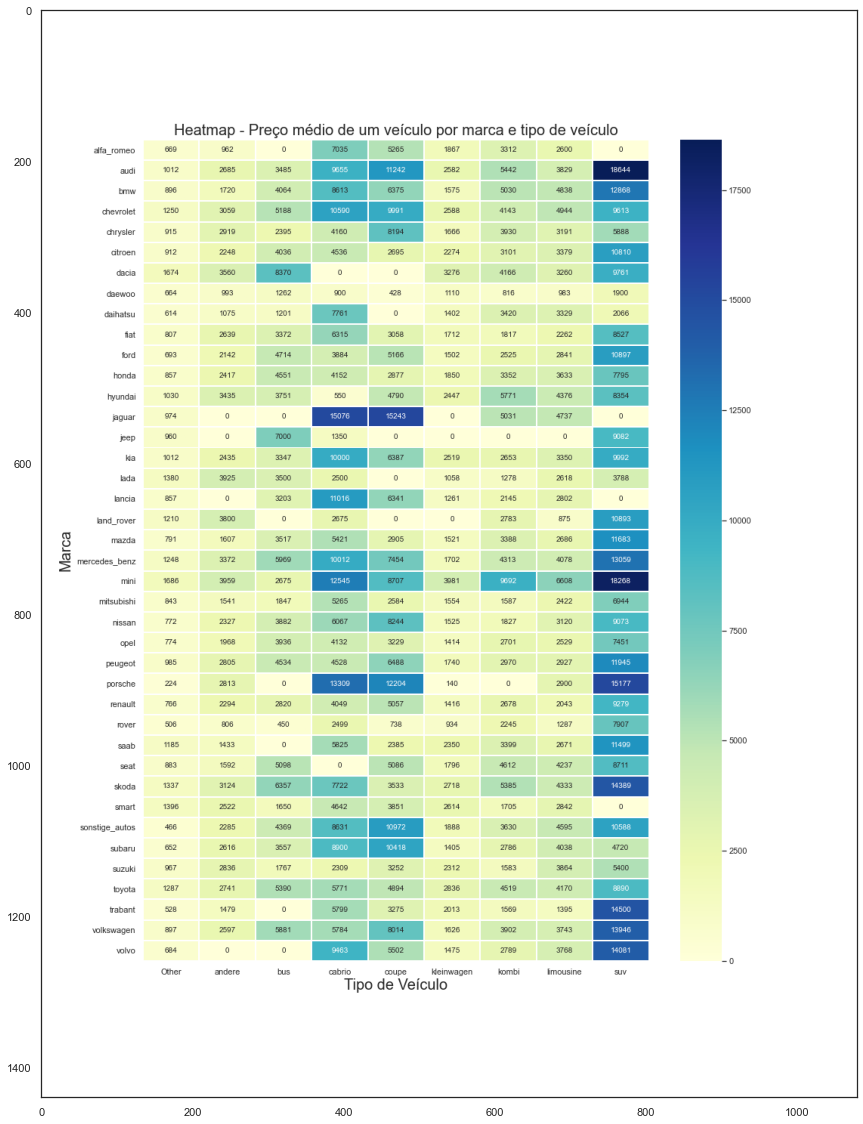

In [29]:
#Original
plt.figure(figsize=(20, 20))
img = mpimg.imread("plots/Analise4/heatmap-price-brand-vehicleType.png")
imgplot = plt.imshow(img)
plt.show()

In [41]:
df_grouped_pivot = df_grouped.pivot("brand","vehicleType", "meanPrice")
df_grouped_pivot

vehicleType,Other,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,,
alfa_romeo,669,962,0,7035,5265,1867,3312,2600,0
audi,1012,2685,3485,9655,11242,2582,5442,3829,18644
bmw,896,1720,4064,8613,6375,1575,5030,4838,12868
chevrolet,1250,3059,5188,10590,9991,2588,4143,4944,9613
chrysler,915,2919,2395,4160,8194,1666,3930,3191,5888
citroen,912,2248,4036,4536,2695,2274,3101,3379,10810
dacia,1674,3560,8370,0,0,3276,4166,3260,9761
daewoo,664,993,1262,900,428,1110,816,983,1900
daihatsu,614,1075,1201,7761,0,1402,3420,3329,2066


Text(156.453125, 0.5, 'Tipo de Veículo')

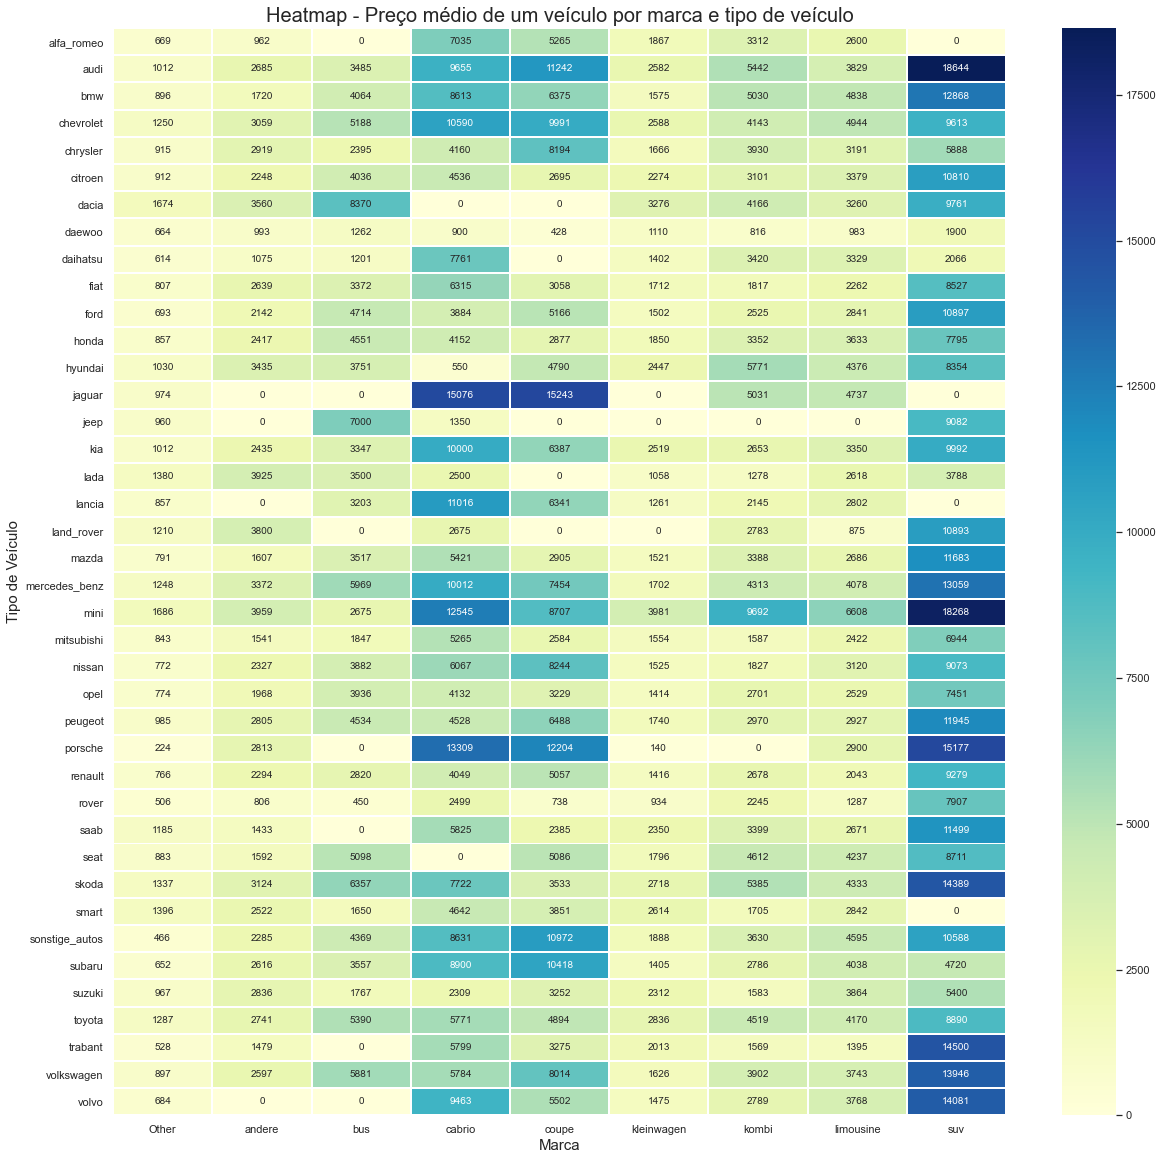

In [49]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df_grouped_pivot, cmap="YlGnBu",linewidths=1, annot=True, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.set_xlabel('Marca', fontsize=15)
ax.set_ylabel('Tipo de Veículo', fontsize=15)

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>